In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from skimage.restoration import denoise_tv_chambolle

In [2]:
df1 = pd.read_csv("drone_data/flight_2_5s.csv")
df1 = df1.dropna(axis=1, how='all')

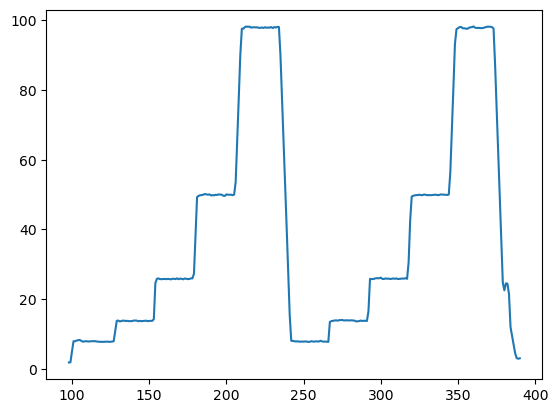

In [3]:
plt.plot(df1["drone25_alt"])

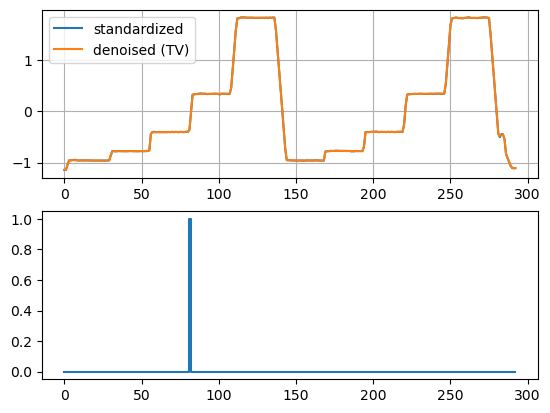

In [4]:
x = df1["drone25_alt"].dropna()
x_std = (x - x.mean()) / x.std()
x_denoise = denoise_tv_chambolle(x_std, weight=0.01)  # adjust the parameters
x_step = -2*np.cumsum(x_denoise)
step_indicator = x_step == x_step.max()


n = x.shape[0]
plt.subplot(211)
plt.plot(range(n), x_std, label='standardized')
plt.plot(range(n), x_denoise, label='denoised (TV)')
plt.legend()
plt.grid()
plt.subplot(212)
plt.step(range(n), step_indicator)
plt.show()

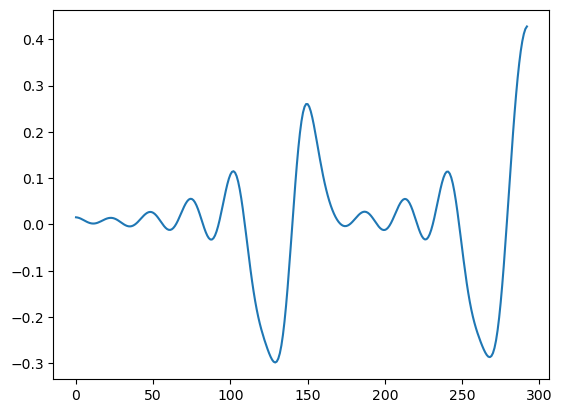

In [5]:
gauss = scipy.ndimage.gaussian_filter(df1["drone25_alt"].dropna(),sigma =9, order = 2)
plt.plot(gauss)

In [6]:
zero_crossings = np.where(np.diff(np.sign(gauss)))[0]

In [7]:
zero_crossings[::2]

array([ 31,  56,  82, 109, 171, 194, 220, 248])

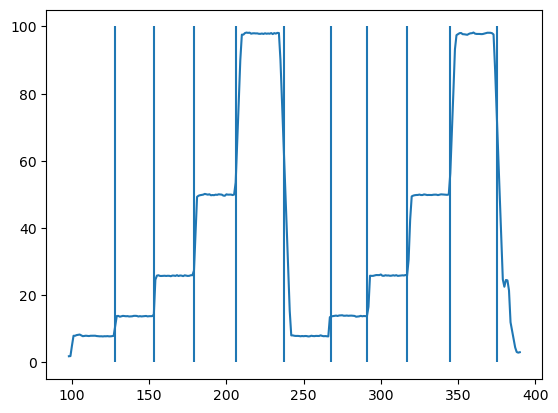

In [52]:
plt.plot(df1["drone25_alt"].dropna())
plt.vlines(zero_crossings[::2]+97,0,100)
plt.vlines([237,375],0,100)

In [9]:
zero_crossings[::2]+97

array([128, 153, 179, 206, 268, 291, 317, 345])

In [33]:
df1["drone25_alt"][318:345].mean()

48.89169824074074

In [14]:
df1["drone25_mpcTemp_pot"][128:153]

128   -2.383292
129   -2.169632
130   -2.041668
131   -1.921830
132   -1.919550
133   -1.851138
134   -1.920926
135   -1.978983
136   -2.142427
137   -2.233974
138   -2.296270
139   -2.297912
140   -2.169015
141   -2.105434
142   -2.107650
143   -2.172798
144   -2.041923
145   -1.982497
146   -1.980426
147   -1.982328
148   -2.104585
149   -2.171156
150   -2.043067
151   -1.979081
152   -1.986920
Name: drone25_mpcTemp_pot, dtype: float64

In [21]:
pos

[1, 2, 4, 5, 7, 8]

array([128, 153, 179, 206, 268, 291, 317, 345])

In [59]:
data_1 = [df1["drone25_mpcTemp_pot"][128:153]
          ,df1["drone25_mpcTemp_pot"][154:179]
          ,df1["drone25_mpcTemp_pot"][180:206]
          ,df1["drone25_mpcTemp_pot"][207:237]
         ]

data_2 = [df1["drone25_mpcTemp_pot"][238:268]
          ,df1["drone25_mpcTemp_pot"][269:291]
          ,df1["drone25_mpcTemp_pot"][292:317]
          ,df1["drone25_mpcTemp_pot"][318:345]
          ,df1["drone25_mpcTemp_pot"][346:375]
         ]

pos_1 = [df1["drone25_alt"][128:153].mean()
          ,df1["drone25_alt"][154:179].mean()
          ,df1["drone25_alt"][180:206].mean()
          ,df1["drone25_alt"][207:237].mean()
        ]

pos_2 = [df1["drone25_alt"][238:268].mean()
          ,df1["drone25_alt"][269:291].mean()
          ,df1["drone25_alt"][292:317].mean()
          ,df1["drone25_alt"][318:345].mean()
         ,df1["drone25_alt"][346:375].mean()
         ]

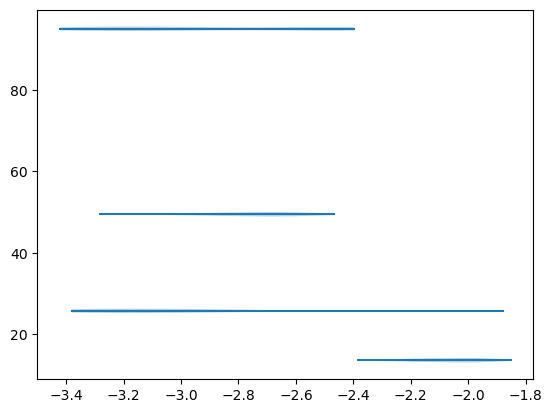

In [61]:
plt.violinplot(data_1, pos_1
               ,vert=False
               ,widths=1.1
               ,showmeans=True
               #,bw_method=0.5
              );

if False:
    plt.violinplot(data_2, pos_2
                   ,vert=False
                   ,widths=1.1
                   ,showmeans=True
                   #,bw_method=0.5
                  );


Text(0.5, 1.0, 'Custom violinplot 10')

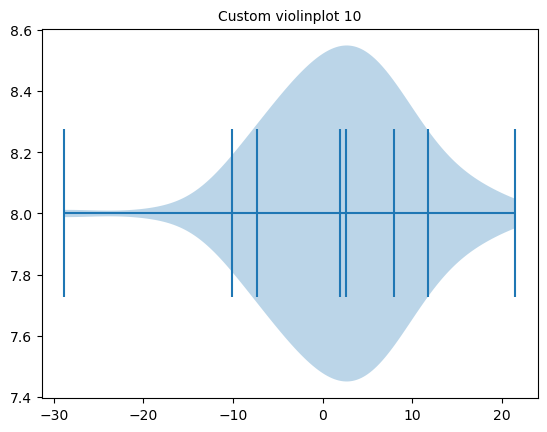

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

plt.violinplot(data[-1:], pos[-1:], points=200, vert=False, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
plt.title('Custom violinplot 10', fontsize=fs)